# Object Tracking: Adam's Method and Convolutional Neural Networks

Author: **Sichen Zhong**

### INTRODUCTION

This project utilizes convolutional neural networks in order to implement image classification on the FashionMNIST dataset. The FashionMNIST dataset is similar to the MNIST dataset in that its images are grey-scaled with a fixed resolution of 28-by-28 pixels and categorized into 10 classes of clothing types. Due to its grey-scale property, the dataset only has 1 RGB color channel and does not need three different color-channels to represent the final color. Hence, it can be represented as a tensor with dimensions Nx1x28x28.  

A convolutional neural network consisting of 2 layers is implemented in order to analyze our images. The architecture is constructed as Input -> Convolution -> Normalization -> ReLU -> Max-Pool -> Convolution -> Normalization -> ReLU -> Max-Pool -> Fully Connected.

The first layer is composed of a 16 channel 2D-convolutional layer with a 5 pixel size kernel, a ReLU non-linearity activation function, a batch normalization layer, and a max pooling layer with a 2 unit size kernel. The second layer is composed of a 32 channel 2D-convolutional layer with a 5 pixel size kernel, a ReLU non-linearity activation function, a batch normalization layer, and a max pooling layer with a 2 unit size kernel. This produces $7*7*32 = 1568$ features that is feeded into a fully-connected layer, which contains a softmax activation function that assigns probabilities to the respective classification categories. Finally, the model is optimized by Adam's Method and trained by minimizing the cross-entropy loss function.

### References
[1] _Convolutional Neural Networks Exercise: Image Classification_, Paul J. Atzberger

### SET UP

In [1]:
import torch;
import torch.nn as nn;
import torchvision;
import torchvision.transforms as transforms;
import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib import image as mp_image
import seaborn as sns

# Configure devices
if torch.cuda.is_available():
  device = torch.device('cuda:0');
else: 
  device = torch.device('cpu');

# Setup the parameters
learningRate = 0.001;
batchSize = 100;
numCategories = 10;
numEpochs = 5;

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# flagDataSet = 'MNIST';
# flagDataSet = 'SVHN';
flagDataSet = 'FashionMNIST';

print("torch.__version__ = " + str(torch.__version__));
print("numpy.__version__ = " + str(np.__version__));

print("device = " + str(device));

torch.__version__ = 1.13.1
numpy.__version__ = 1.21.5
device = cpu


### FUNCTION DEFINITIONS

In [2]:
def plot_image_array(img_arr,label_arr=None,title=None,figSize=(18,18),title_yp=0.95,cmap="gray"):

    # determine number of images we need to plot
    numSamples = len(img_arr);
    sqrtS      = int(np.sqrt(numSamples));
    rows       = sqrtS;
    cols       = sqrtS;

    #fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(18,18));
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figSize);

    I = 0;
    for i in range(0,sqrtS):
        #print("pid = %d"%pid)
        for j in range(0,sqrtS):
            #img = img_arr[I];
            #print("i,j = (%d,%d)"%(i,j));
            if cmap is not None:
              axs[i,j].imshow(img_arr[I], cmap=cmap);
            else:
              axs[i,j].imshow(img_arr[I]);
            if label_arr is not None:
              axs[i,j].set_title("%s"%label_arr[I]);
            axs[i,j].set_xticks([]);
            axs[i,j].set_yticks([]);
            I += 1;

    if title is None:
      plt.suptitle("Collection of Images", fontsize=18,y=title_yp);
    else:
      plt.suptitle(title, fontsize=18,y=title_yp);
    #plt.subplots_adjust(hspace=0.1,wspace=0.1);

    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
    #                    wspace=0.0)
    

### LOAD DATASET

In [3]:
if flagDataSet == 'MNIST':
  # MNIST dataset
  train_dataset = torchvision.datasets.MNIST(root='./data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True);

  test_dataset = torchvision.datasets.MNIST(root='./data/',
                                            train=False, 
                                            transform=transforms.ToTensor());

  categoryNames = ['0','1','2','3','4','5','6','7','8','9'];
    
elif flagDataSet == 'SVHN':
  # SVHN dataset
  train_dataset = torchvision.datasets.SVHN(root='./data/svhn',
                                            split='train',
                                            transform=transforms.Compose([transforms.ToTensor(), normalize]),
                                            download=True);

  test_dataset = torchvision.datasets.SVHN(root='./data/svhn',
                                            split='test',
                                            transform=transforms.Compose([transforms.ToTensor(), normalize]),
                                            download=True);

  #categoryNames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'];
  categoryNames = ['0','1','2','3','4','5','6','7','8','9'];

elif flagDataSet == 'FashionMNIST':
  # FashionMNIST dataset
  train_dataset = torchvision.datasets.FashionMNIST(root='./data/',
                                            train = True,
                                            transform=transforms.ToTensor(),
                                            download=True);

  test_dataset = torchvision.datasets.FashionMNIST(root='./data/',
                                            train = False,
                                            transform=transforms.ToTensor());

  #categoryNames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'];
  categoryNames = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"];

else:
  print("flagDataSet not recognized.");
  print("flagDataSet = " + str(flagDataSet));
  raise;

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batchSize, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batchSize, 
                                          shuffle=False)


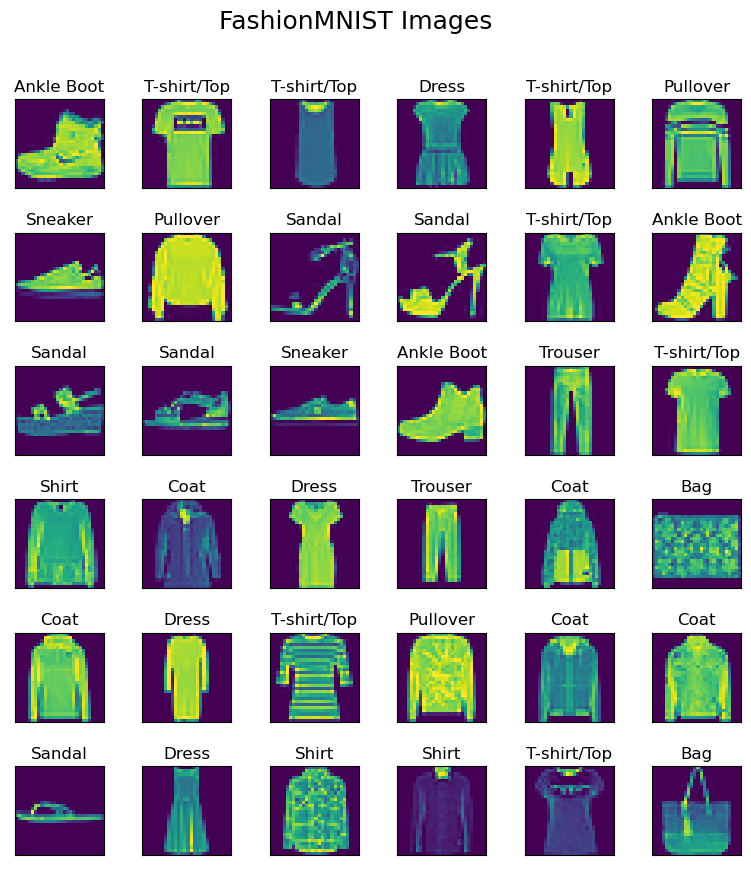

In [4]:
# Show subset of the data 
img_arr = [];
label_str_arr = [];

numImages = len(train_dataset);
#II = np.random.permutation(numImages); # compute random collection of indices @optimize
II = np.arange(numImages);

if flagDataSet == 'MNIST':
  for I in np.arange(0,36):
    img_arr.append(np.array(train_dataset[II[I]][0][0]));
  plot_image_array(img_arr,title='Collection of Digits',figSize=(6,6),title_yp=1.0);
elif flagDataSet == 'SVHN':
  for I in np.arange(0,36):
    img = np.array(train_dataset[II[I]][0]);
    img = np.transpose(img,(1,2,0));
    img_arr.append(img);
    l_true_str = categoryNames[train_dataset[II[I]][1]];
    label_str_arr.append(l_true_str);
  plot_image_array(img_arr,label_str_arr,title='SVHN Images',figSize=(9,9),title_yp=1.02,cmap=None);    
  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.0);
elif flagDataSet == 'FashionMNIST':
  for I in np.arange(0,36):
    img = np.array(train_dataset[II[I]][0]);
    img = np.transpose(img,(1,2,0));
    img_arr.append(img);
    l_true_str = categoryNames[train_dataset[II[I]][1]];
    label_str_arr.append(l_true_str);
  plot_image_array(img_arr,label_str_arr,title='FashionMNIST Images',figSize=(9,9),title_yp=1.02,cmap=None);    
  plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.0);


#print(len(img_arr))
#print(img_arr[0].shape)

### CONVOLUTIONAL NEURAL NETWORK

In [5]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, numCategories=10):
        super(ConvNet, self).__init__()
        if flagDataSet == 'MNIST':  # assumed images are given as 1x28x28
          self.layer1 = nn.Sequential(
              nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(num_features=16),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2));
          self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2));
          self.fc = nn.Linear(7*7*32, numCategories);
        elif flagDataSet == 'SVHN': # assumed images are given as 3x32x32
          self.layer1 = nn.Sequential(
              nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(num_features=16),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2));
          self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2));
          self.fc = nn.Linear(8*8*32, numCategories);
        if flagDataSet == 'FashionMNIST':  # assumed images are given as 1x28x28
          self.layer1 = nn.Sequential(
              nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
              nn.BatchNorm2d(num_features=16),
              nn.ReLU(),
              nn.MaxPool2d(kernel_size=2, stride=2));
          self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2));
          self.fc = nn.Linear(7*7*32, numCategories);

    def forward(self, x):
        out = self.layer1(x);
        out = self.layer2(out);
        out = out.reshape(out.size(0), -1);
        out = self.fc(out);
        return out;

model = ConvNet(numCategories).to(device);
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


### TRAIN NEURAL NETWORK

Part I: Adam's Method

In [6]:
# Set Up Optimization Method: Adam's Method
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate);

Part II: Loss Function

In [7]:
# Set Up Loss Function
loss_func = nn.CrossEntropyLoss();

print("Training the CNN with:");
print("numEpochs = %d"%numEpochs);
print("batchSize = %d"%batchSize);
print(" ");

# Track Metrics
numSteps = len(train_loader);
training_loss = []
validation_loss = []
test = []

# Train the model
for epoch in range(numEpochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device);
        labels = labels.to(device);
        
        # Forward pass
        outputs = model(images);
        loss = loss_func(outputs, labels);
        
        # Backward and optimize
        optimizer.zero_grad();
        loss.backward();
        optimizer.step();
        
        if ((i + 1) % 100) == 0:
          print ('Epoch: [%d/%d]; batchStep = [%d/%d]; Loss: %.4f.'%(epoch+1, numEpochs, i + 1, numSteps, loss.item()));
          # validation_loss.append(loss.cpu().detach().numpy())
          # training_loss.append(int(loss))
          validation_loss.append(float(loss.item()))


Training the CNN with:
numEpochs = 5
batchSize = 100
 
Epoch: [1/5]; batchStep = [100/600]; Loss: 0.3773.
Epoch: [1/5]; batchStep = [200/600]; Loss: 0.4443.
Epoch: [1/5]; batchStep = [300/600]; Loss: 0.3738.
Epoch: [1/5]; batchStep = [400/600]; Loss: 0.3674.
Epoch: [1/5]; batchStep = [500/600]; Loss: 0.3079.
Epoch: [1/5]; batchStep = [600/600]; Loss: 0.4469.
Epoch: [2/5]; batchStep = [100/600]; Loss: 0.3149.
Epoch: [2/5]; batchStep = [200/600]; Loss: 0.2853.
Epoch: [2/5]; batchStep = [300/600]; Loss: 0.3068.
Epoch: [2/5]; batchStep = [400/600]; Loss: 0.2669.
Epoch: [2/5]; batchStep = [500/600]; Loss: 0.3606.
Epoch: [2/5]; batchStep = [600/600]; Loss: 0.2655.
Epoch: [3/5]; batchStep = [100/600]; Loss: 0.1080.
Epoch: [3/5]; batchStep = [200/600]; Loss: 0.2849.
Epoch: [3/5]; batchStep = [300/600]; Loss: 0.2093.
Epoch: [3/5]; batchStep = [400/600]; Loss: 0.2422.
Epoch: [3/5]; batchStep = [500/600]; Loss: 0.2674.
Epoch: [3/5]; batchStep = [600/600]; Loss: 0.2636.
Epoch: [4/5]; batchStep = [

Part III: View Loss History

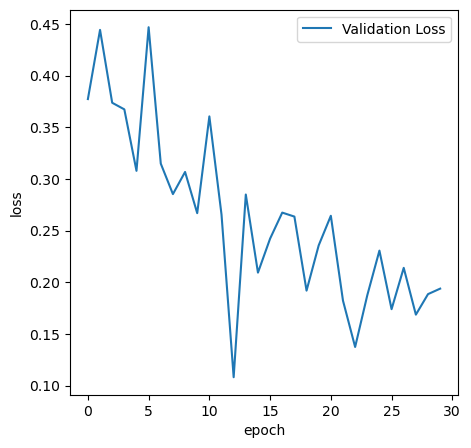

In [8]:
plt.figure(figsize=(5,5))
# plt.plot(numEpochs, train_loader)
plt.plot(validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Validation Loss'], loc='upper right')
plt.show()

### TEST PREDICTIONS

In [13]:
# Test the model
print("Testing predictions of the neural network:");
print("");

# Save the first few to show as examples of labeling
saved_test_img = [];
saved_test_label_true = [];
saved_test_label_pred = [];

model.eval();  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0;
    total = 0;
    II = 0;
    for images, labels in test_loader: # loads data in batches and then sums up
        
        if (II >= 1000):
          print("tested on %d images"%total);
          II = 0;
        
        images = images.to(device);
        labels = labels.to(device);
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1);
        total += labels.size(0);
        correct += (predicted == labels).sum().item();
        
        #print(I);
        #print(images.shape);
        #print(labels.shape);
        II += labels.size(0);
        
        img = np.transpose(images[0],(1,2,0)); # sample just first image of the batch
        saved_test_img.append(img);
        saved_test_label_true.append(labels[0].item());
        saved_test_label_pred.append(predicted[0].item());
        
    print("");
    print("Tested on a total of %d images."%total);    
    print("");
    test_accuracy = correct/total;
        
    print("The neural network has an accuracy of %.2f%% on the %d test images."%(100*test_accuracy,total));
    #print('Accuracy of the  on the %d test images: {} %'.format(100 * correct / total))

Testing predictions of the neural network:

tested on 1000 images
tested on 2000 images
tested on 3000 images
tested on 4000 images
tested on 5000 images
tested on 6000 images
tested on 7000 images
tested on 8000 images
tested on 9000 images

Tested on a total of 10000 images.

The neural network has an accuracy of 90.31% on the 10000 test images.


### SAMPLE PREDICTIONS

In [10]:
# collect a subset of the data to show and attach named labels
numSamplesShow = 100;

ss_img   = saved_test_img[0:numSamplesShow];
ss_label_true = saved_test_label_true[0:numSamplesShow];
ss_label_pred = saved_test_label_pred[0:numSamplesShow];

ss_label_str  = [];
numLabels = len(saved_test_label_true);
for i in range(0,numLabels):
  l_true = saved_test_label_true[i];
  l_pred = saved_test_label_pred[i];
  l_pred_str = categoryNames[l_pred];
  l_true_str = categoryNames[l_true];
  #sstr = "%s:%s"%(l_pred,l_true);                
  sstr = "%s:\n%s"%(l_pred_str,l_true_str);
  ss_label_str.append(sstr);

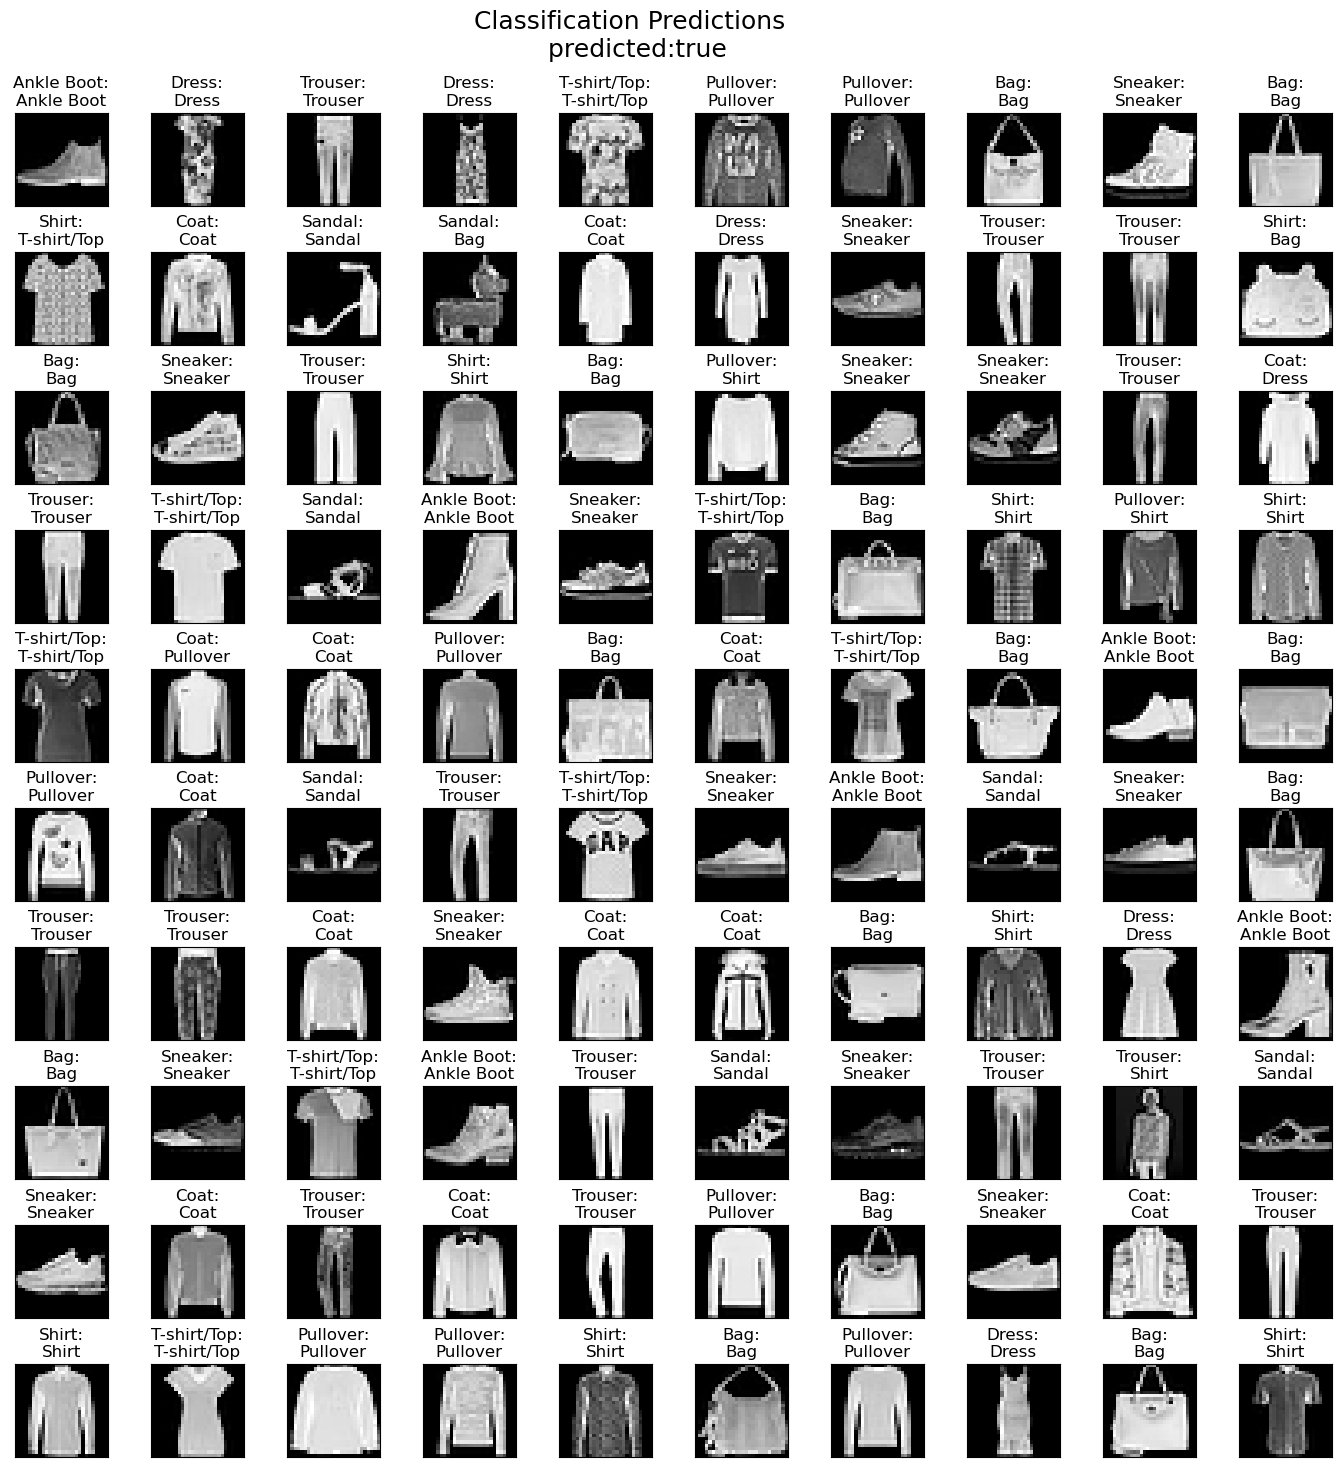

In [11]:
plot_image_array(ss_img,ss_label_str,title="Classification Predictions \n predicted:true",figSize=(16,16),title_yp=0.985);
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0);

### SAVE MODEL

In [12]:
torch.save(model.state_dict(), 'cnn_trained.ckpt')

### SUMMARY

The project successfully trains a 2-layer CNN to classify images in the FashionMNIST image dataset. It has an accuracy rate of around 90%, which indicates that there is still room for improvement to optimize the CNN even further. I would also recommend utilizing the MNIST and SVHN image datasets that are also pre-loaded in the code to futher analyze the usage of 2-layer CNN in image classification.